<a href="https://colab.research.google.com/github/anqi-guo/udacity-dsnd-blog-post/blob/main/calendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/study/DSND/airbnb'

Mounted at /content/drive


In [17]:
import pandas as pd
df_ny = pd.read_csv(f'{DATA_PATH}/data/calendar-202112.csv')
df_sh = pd.read_csv(f'{DATA_PATH}/data/calendar-202112-sh.csv')

df_ny['date'] = pd.to_datetime(df_ny['date'])
df_sh['date'] = pd.to_datetime(df_sh['date'])

df_ny.sort_values(by=['listing_id', 'date'], inplace=True)
df_sh.sort_values(by=['listing_id', 'date'], inplace=True)

In [18]:
df_ny.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2595,2021-12-05,f,$150.00,$150.00,30.0,1125.0
204,2595,2021-12-06,f,$150.00,$150.00,30.0,1125.0
205,2595,2021-12-07,f,$150.00,$150.00,30.0,1125.0
617,2595,2021-12-08,f,$150.00,$150.00,30.0,1125.0
618,2595,2021-12-09,f,$150.00,$150.00,30.0,1125.0


In [19]:
df_sh.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
38,24963,2021-12-24,f,$480.00,$480.00,3.0,365.0
39,24963,2021-12-25,f,$480.00,$480.00,3.0,365.0
40,24963,2021-12-26,f,$480.00,$480.00,3.0,365.0
41,24963,2021-12-27,f,$480.00,$480.00,3.0,365.0
42,24963,2021-12-28,f,$480.00,$480.00,3.0,365.0


In [20]:
df_ny['listing_id'].nunique(), df_sh['listing_id'].nunique()

(38259, 29165)

# Percentage of available dates

In [23]:
g_ny = df_ny.groupby('listing_id')['available'].value_counts().unstack()
g_ny = g_ny.fillna(0)
g_ny['t_pct'] = g_ny['t'] / 365

In [24]:
g_sh = df_sh.groupby('listing_id')['available'].value_counts().unstack()
g_sh = g_sh.fillna(0)
g_sh['t_pct'] = g_sh['t'] / 365

In [25]:
g_ny.head()

available,f,t,t_pct
listing_id,,,
2595,27.0,338.0,0.926027
3831,171.0,194.0,0.531507
5121,0.0,365.0,1.000000
5136,242.0,123.0,0.336986
5178,173.0,192.0,0.526027


In [45]:
g_ny['t'].value_counts(normalize=True)

0.0      0.367992
365.0    0.036828
364.0    0.016963
338.0    0.011448
90.0     0.007475
           ...   
200.0    0.000261
210.0    0.000235
201.0    0.000209
183.0    0.000183
193.0    0.000157
Name: t, Length: 366, dtype: float64

In [46]:
g_sh['t'].value_counts(normalize=True)

365.0    0.119287
0.0      0.081570
364.0    0.061512
363.0    0.038334
336.0    0.030310
           ...   
105.0    0.000034
100.0    0.000034
252.0    0.000034
224.0    0.000034
124.0    0.000034
Name: t, Length: 359, dtype: float64

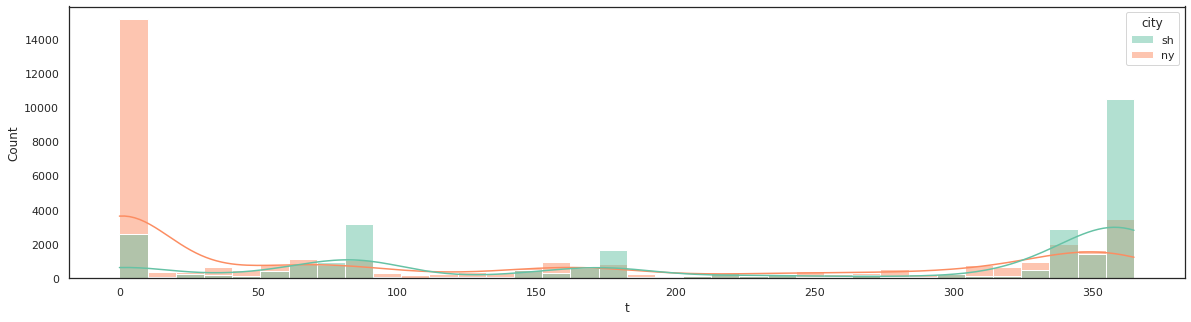

In [42]:
import seaborn as sns

g_sh['city'] = 'sh'
g_ny['city'] = 'ny'

g = g_sh.append(g_ny)

sns.set(rc={'figure.figsize':(20,5)}, style="white", palette="Set2")
sns.histplot(data=g, x="t", hue='city', kde=True, bins=36);

# Price change

In [ ]:
g = df_ny.groupby('listing_id')

In [ ]:
df_sh.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [ ]:
df_sh[df_sh['date']==df_sh['date'].max()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1787,322045,2022-12-24,t,$468.00,$468.00,1.0,1125.0
2038,5666556,2022-12-24,f,$208.00,$208.00,6.0,1125.0
2278,1812392,2022-12-24,t,$88.00,$88.00,2.0,1125.0
2908,5676649,2022-12-24,f,$110.00,$110.00,2.0,1125.0
3258,402315,2022-12-24,t,$428.00,$428.00,1.0,1125.0
...,...,...,...,...,...,...,...
10643767,53775646,2022-12-24,t,$308.00,$308.00,1.0,1125.0
10644132,44508571,2022-12-24,t,$160.00,$157.00,1.0,1125.0
10644497,53353759,2022-12-24,t,"$1,894.00","$1,894.00",1.0,365.0
10644862,53775502,2022-12-24,t,$408.00,$408.00,1.0,1125.0


In [ ]:
df_ny.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [ ]:
df_sh.shape, df_ny.shape

((10645228, 7), (13964535, 7))

In [ ]:
df_sh.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5661881,2021-12-24,f,$429.00,$429.00,1.0,30.0
1,5661881,2021-12-25,f,$429.00,$429.00,1.0,30.0
2,5661881,2021-12-26,f,$399.00,$399.00,1.0,30.0
3,5661881,2021-12-27,f,$399.00,$399.00,1.0,30.0
4,5661881,2021-12-28,f,$399.00,$399.00,1.0,30.0


In [ ]:
df_sh[df_sh['listing_id']==5661881]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5661881,2021-12-24,f,$429.00,$429.00,1.0,30.0
1,5661881,2021-12-25,f,$429.00,$429.00,1.0,30.0
2,5661881,2021-12-26,f,$399.00,$399.00,1.0,30.0
3,5661881,2021-12-27,f,$399.00,$399.00,1.0,30.0
4,5661881,2021-12-28,f,$399.00,$399.00,1.0,30.0
...,...,...,...,...,...,...,...
990,5661881,2022-12-19,f,$399.00,$399.00,1.0,30.0
991,5661881,2022-12-20,f,$399.00,$399.00,1.0,30.0
992,5661881,2022-12-21,f,$399.00,$399.00,1.0,30.0
993,5661881,2022-12-22,f,$399.00,$399.00,1.0,30.0


In [ ]:
listings_ny = pd.read_csv(f'{DATA_PATH}/data/listings-202112.csv')
listings_ny.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN


In [ ]:
listings_sh = pd.read_csv(f'{DATA_PATH}/data/listings-202112-sh.csv')
listings_sh.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,24963,Heart of French Built Music Conservatory / Home,98203,Jia,NaN,徐汇区 / Xuhui District,31.210730,121.45159,Entire home/apt,480,3,85,2020-08-15,0.62,1,326,0,NaN
1,322045,【sidihome】『Impression·Flower』ART studio downtown,681552,Leon,NaN,静安区 / Jing'an District,31.242400,121.44449,Entire home/apt,464,1,42,2020-06-28,0.36,15,330,0,NaN
2,402315,Sidihome·Moon Treasures SIMPLE APT IN DOWNTOWN,681552,Leon,NaN,静安区 / Jing'an District,31.242769,121.44355,Entire home/apt,400,1,32,2021-12-19,0.28,15,275,5,NaN
3,479499,【sidihome】Plum flower Luxury movie apt in JING'AN,681552,Leon,NaN,静安区 / Jing'an District,31.243827,121.44424,Entire home/apt,464,1,29,2021-10-07,0.25,15,236,1,NaN
4,479506,【Sidihome】ENGLAND type cozy studio in downtown,681552,Leon,NaN,静安区 / Jing'an District,31.242110,121.44259,Entire home/apt,394,1,35,2021-11-26,0.30,15,49,1,NaN


In [ ]:
pd.set_option('display.max_colwidth', None)
listings_sh.query('id == 5661881')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
106,5661881,"水景阳台大床房(推窗临河,免费体验书画慢生活)入住赠送画家明信片",29350936,朱家角初见时光民宿,NaN,青浦区 / Qingpu District,31.10716,121.05363,Private room,399,1,0,NaN,NaN,2,0,0,NaN


In [ ]:
reviews_sh = pd.read_csv(f'{DATA_PATH}/data/reviews-202112-sh.csv')
reviews_sh.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,24963,105158,2010-09-26,125515,Lucia,"Even though the actual apt listed was not ready due to a renovation delay, Jia was gracious and nice enough to let us stay in her own apt, which turned out to be very large, nice and comfortable place. We felt very much at home and had a great time. My husband and I were there for the World Expo so we, unfortunately, didn't get a chance to explore the neighborhood as much as we liked, but it of what we saw, we really liked. \r<br/>\r<br/>My only complaint is that the apartment we stayed in was in a very residential area and the walk to the subway was a bit far. Taxis are very affordable, but sometimes difficult to find a free one. Of course this might not pertain to the actual apt Jia has listed, which, I think, is located closer to the subway. \r<br/>\r<br/>Overall, Jia was a great host. She was very accommodating, helpful and made us feel very welcomed. She helped us order a taxi on our last day and even introduced us to local Chinese teas and fruits as well. :) I would highly recommend her!"
1,24963,191610,2011-03-03,311924,Marty,"Jia's place is in a vibrant and (in my opinion!) the most beautiful section of Shanghai. The French Concession is known for its leafy streets lined with cafes, boutique shops, upscale spas, yoga studios, and art galleries. Shanghai’s nickname as the “Paris of the East” evidently stems from the tree-lined avenues, Tudor mansions and French-influence architecture of this district. Exploring every alley of this graceful district would likely take a long time, and the constant renewal process that occurs in Shanghai insures that the urban landscape will likely be quite different in a few years than what it offers today. In particular I liked the area just north of Huaihai Rd, as Fenyang Rd. turns into Donghu Rd. Within a 10-minute walk you have your choice of dozens of upscale delicious ethnic restaurants and it is less than a 10-minute walk to Changshu Rd. subway station. Centrally located within Puxi, the center of Shanghai, you couldn't ask for a more convenient location. One thing I really like about Jia's apartment is that music can be heard from all corners of the apartment complex. Just next door a junior high school student practiced the violin for hours upon hours a day. Across the courtyard, there was the sound of a saxophone, and around the corner someone practiced Chinese folk songs on a dizi. This really enchanted my daily life. Since the apartment is just around the corner from the Shanghai Conservatory of Music, the entire area is packed with music shops selling scores, CDs, and instruments. The apartment is not large but clean, well-appointed, and gets great light. I really enjoyed washing my laundry and hanging it out to air-dry on bamboo poles like my Chinese neighbors! Make sure you you use clips though, or your clothes will fall down to the 1st floor garden apartment! The friendly security guard had to help me retrieve my clothes. The apartment is in a very safe area and is constantly under surveillance by a security guard. Although it is always a good idea to lock your windows in any large city, it is unlikely that a thief could enter this complex unnoticed. At night, a large gate to the complex is closed to prevent traffic from entering and guests must check in with a security guard. Although Fuxing Rd. is busy and noisy, the apartment is set back from the main road so it is quiet and peaceful at night. There were a few minor maintenance issues with the apartment during the time I was there, but Jia always responded promptly. Even when she couldn't come over herself, her adorable father would eagerly come over to help! I must admit that my body didn't react well at first to Shanghai and I was sick on and off for about two months, not to mention suffering somewhat from culture shock. Jia helped me more than once with medicine and the like and provided a compassionate ear. On more than on

In [ ]:
reviews_ny = pd.read_csv(f'{DATA_PATH}/data/reviews-202112.csv')
reviews_ny.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,"Notre séjour de trois nuits.\r<br/>Nous avons apprécier L'appartement qui est très bien situé. Agréable, propre et bien soigné. C'est idéal pour une famille de 3 ou 4 personnes.\r<br/>Petits soucis en arrivant il y avait personne pour nous recevoir, et il manquait le savon pour la douche, le liquide vaisselle, nous les avons reçu de surlendemain. Il y a aussi le bruit du Métro de NY, donc une première nuit difficile si on est pas habitué. Jennifer est correcte le remboursement de la caution était très rapide. A part ces petits détails notre court séjour c'est bien passé. \r<br/>Si j'ai la possibilité de revenir sur NY pour les vacances, je reprendrai à ""The Midtown Castle""\r<br/>Jean\r<br/>Possession - Ile de La Réunion\r<br/>"
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,"I've stayed with my friend at the Midtown Castle for six days and it was a lovely place to be. A big spacious room with a pointy roof, which really makes you feel like staying in a castle. The location is perfect. It is just a few steps from Macy's Time Square and Theatre District. Everything worked just perfect with the keys etc. Thank you so much Jennifer, we had a great time in New York.\r<br/>Attention: it's on the 4th floor without a lift :-) but definetely worth it!"
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, enjoying to be in the center of the city, that never sleeps...short ways to everywhere in Manhattan, by subway or by walk. Midtown castle is a beauftiful and tastful place, Jennifer and Tori relaxed and friendly hosts - thats why we - the three Berliners - recommand that place! Good to have WiFi and a little kitchen too!"
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming apartment! They were very organized and helpful; I would definitely recommend staying at the Midtown Castle!
